https://rstudio-pubs-static.s3.amazonaws.com/63893_9f6bc9cd73ad47aab3aa85d0193244d9.html



### Simple Linear Regression - An example using R
Felipe Rego
March, 2015

Linear regression is a type of supervised statistical learning approach that is useful for predicting a quantitative response Y. It can take the form of a single regression problem (where you use only a single predictor variable X) or a multiple regression (when more than one predictor is used in the model). It is one of the simplest and most straightforward approaches available and it is a starting point for more advanced modelling and predictive exercises.

This example will illustrate the application of a linear regression exercise using one single predictor (Simple Linear Regression).

The dataset used is called Prestige and comes from the car package library(car). The Prestige dataset is a data frame with 102 rows and 6 columns. Each row is an observation that relates to an occupation. The columns relate to predictors such as average years of education, percentage of women in the occupation, prestige of the occupation, etc.

Let’s load the required libraries and inspect the dataset:

In [1]:
# load the package that contains the full dataset and the data viz package.
library(car)
library(ggplot2) # for some nice looking graphs!
library(MASS) # Another library for our box-cox transform down the end.

In [2]:
# Inspect and summarize the data.
head(Prestige,5)

,education,income,women,prestige,census,type
gov.administrators,13.11,12351,11.16,68.8,1113,prof
general.managers,12.26,25879,4.02,69.1,1130,prof
accountants,12.77,9271,15.70,63.4,1171,prof
purchasing.officers,11.42,8865,9.11,56.8,1175,prof
chemists,14.62,8403,11.68,73.5,2111,prof


In [3]:
str(Prestige)

'data.frame':	102 obs. of  6 variables:
 $ education: num  13.1 12.3 12.8 11.4 14.6 ...
 $ income   : int  12351 25879 9271 8865 8403 11030 8258 14163 11377 11023 ...
 $ women    : num  11.16 4.02 15.7 9.11 11.68 ...
 $ prestige : num  68.8 69.1 63.4 56.8 73.5 77.6 72.6 78.1 73.1 68.8 ...
 $ census   : int  1113 1130 1171 1175 2111 2113 2133 2141 2143 2153 ...
 $ type     : Factor w/ 3 levels "bc","prof","wc": 2 2 2 2 2 2 2 2 2 2 ...


In [4]:
summary(Prestige)

   education          income          women           prestige    
 Min.   : 6.380   Min.   :  611   Min.   : 0.000   Min.   :14.80  
 1st Qu.: 8.445   1st Qu.: 4106   1st Qu.: 3.592   1st Qu.:35.23  
 Median :10.540   Median : 5930   Median :13.600   Median :43.60  
 Mean   :10.738   Mean   : 6798   Mean   :28.979   Mean   :46.83  
 3rd Qu.:12.648   3rd Qu.: 8187   3rd Qu.:52.203   3rd Qu.:59.27  
 Max.   :15.970   Max.   :25879   Max.   :97.510   Max.   :87.20  
     census       type   
 Min.   :1113   bc  :44  
 1st Qu.:3120   prof:31  
 Median :5135   wc  :23  
 Mean   :5402   NA's: 4  
 3rd Qu.:8312            
 Max.   :9517            

In [5]:
# Subset the data to capture only income and education.
newdata = Prestige[,c(1:2)]
summary(newdata)

   education          income     
 Min.   : 6.380   Min.   :  611  
 1st Qu.: 8.445   1st Qu.: 4106  
 Median :10.540   Median : 5930  
 Mean   :10.738   Mean   : 6798  
 3rd Qu.:12.648   3rd Qu.: 8187  
 Max.   :15.970   Max.   :25879  

Warning message:
“Ignoring unknown parameters: labels”Warning message:
“Ignoring unknown parameters: labels”

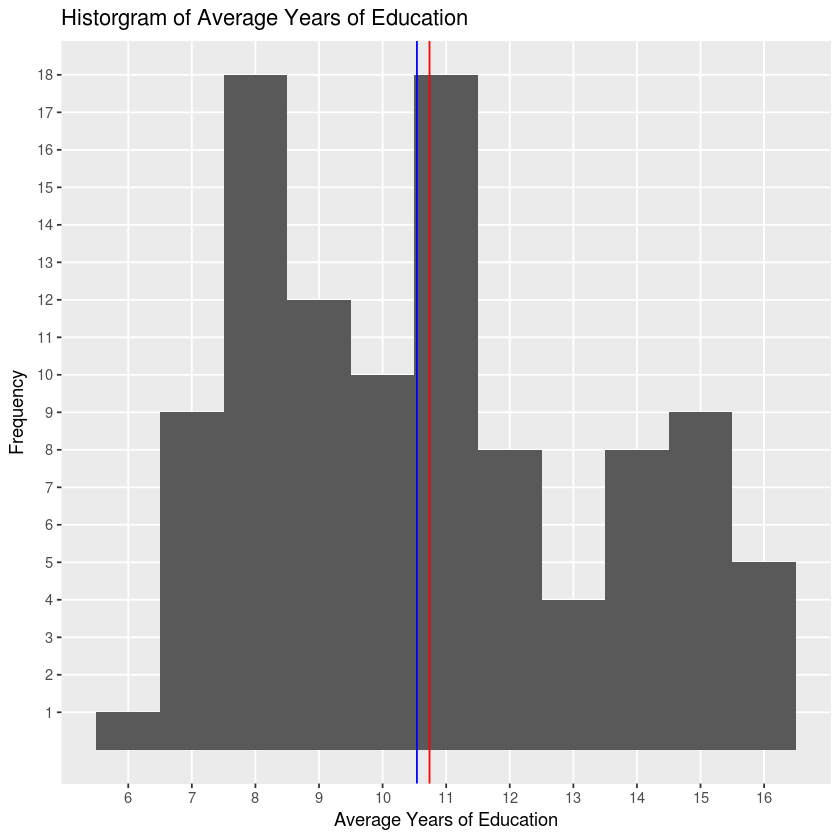

In [12]:
# Histogram of Education
qplot(education, data = newdata, geom="histogram", binwidth=1) +
  labs(title = "Historgram of Average Years of Education") +
  labs(x ="Average Years of Education") +
  labs(y = "Frequency") +
  scale_y_continuous(breaks = c(1:20), minor_breaks = NULL) +
  scale_x_continuous(breaks = c(6:16), minor_breaks = NULL) +
   geom_vline(xintercept = mean(newdata$education), show.legend=TRUE, color="red", labels="Average") +
  geom_vline(xintercept = median(newdata$education), show.legend=TRUE, color="blue", labels="Median")

Warning message:
“Ignoring unknown parameters: labels”Warning message:
“Ignoring unknown parameters: labels”

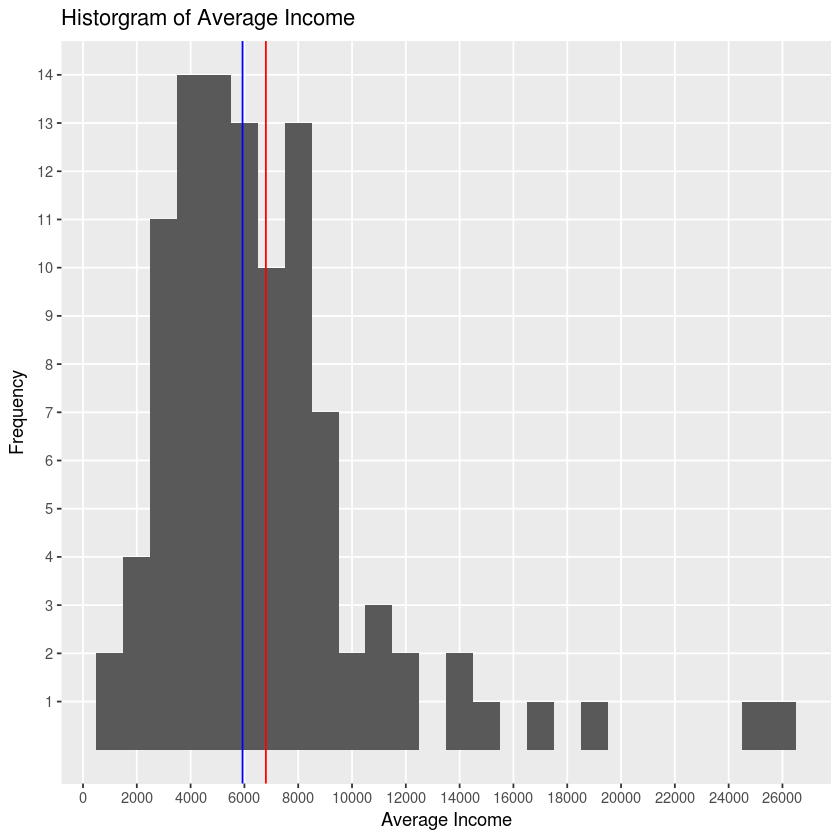

In [13]:
# Histogram of Income
qplot(income, data = newdata, geom="histogram", binwidth=1000) +
  labs(title = "Historgram of Average Income") +
  labs(x ="Average Income") +
  labs(y = "Frequency") +
  scale_y_continuous(breaks = c(1:20), minor_breaks = NULL) +
  scale_x_continuous(breaks = c(0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000, 22000, 24000, 26000), minor_breaks = NULL) +
  geom_vline(xintercept = mean(newdata$income), show.legend=TRUE, color="red", labels="Average") +
  geom_vline(xintercept = median(newdata$income), show.legend=TRUE, color="blue", labels="Median")

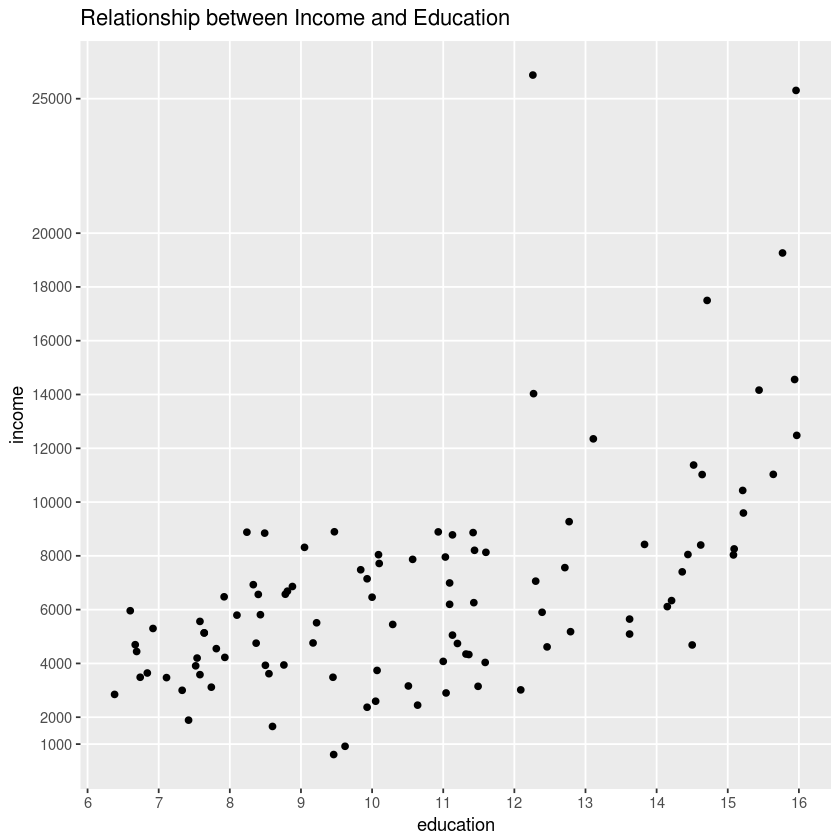

In [14]:
# Create a plot of the subset data.
qplot(education, income, data = newdata, main = "Relationship between Income and Education") +
  scale_y_continuous(breaks = c(1000, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000, 25000), minor_breaks = NULL) +
  scale_x_continuous(breaks = c(6:16), minor_breaks = NULL)

In [15]:
# fit a linear model and run a summary of its results.
set.seed(1)
education.c = scale(newdata$education, center=TRUE, scale=FALSE)
mod = lm(income ~ education.c, data = newdata)
summary(mod)


Call:
lm(formula = income ~ education.c, data = newdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-5493.2 -2433.8   -41.9  1491.5 17713.1 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6797.9      344.9  19.709  < 2e-16 ***
education.c    898.8      127.0   7.075 2.08e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3483 on 100 degrees of freedom
Multiple R-squared:  0.3336,	Adjusted R-squared:  0.3269 
F-statistic: 50.06 on 1 and 100 DF,  p-value: 2.079e-10


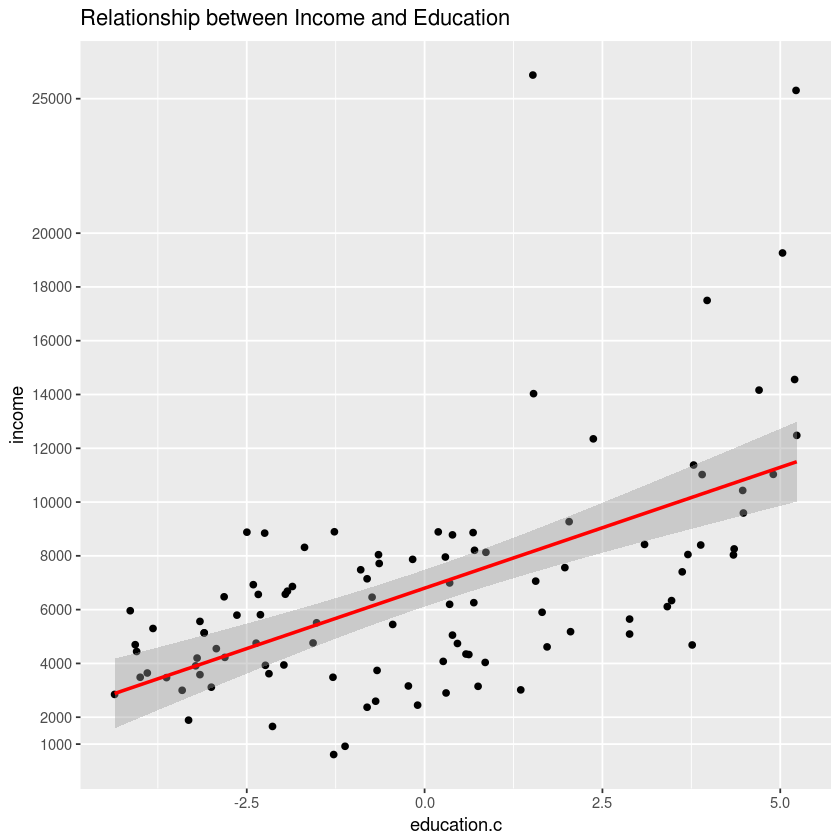

In [16]:
# visualize the model results.
qplot(education.c, income, data = newdata, main = "Relationship between Income and Education") +
  stat_smooth(method="lm", col="red") +
  scale_y_continuous(breaks = c(1000, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000, 25000), minor_breaks = NULL)

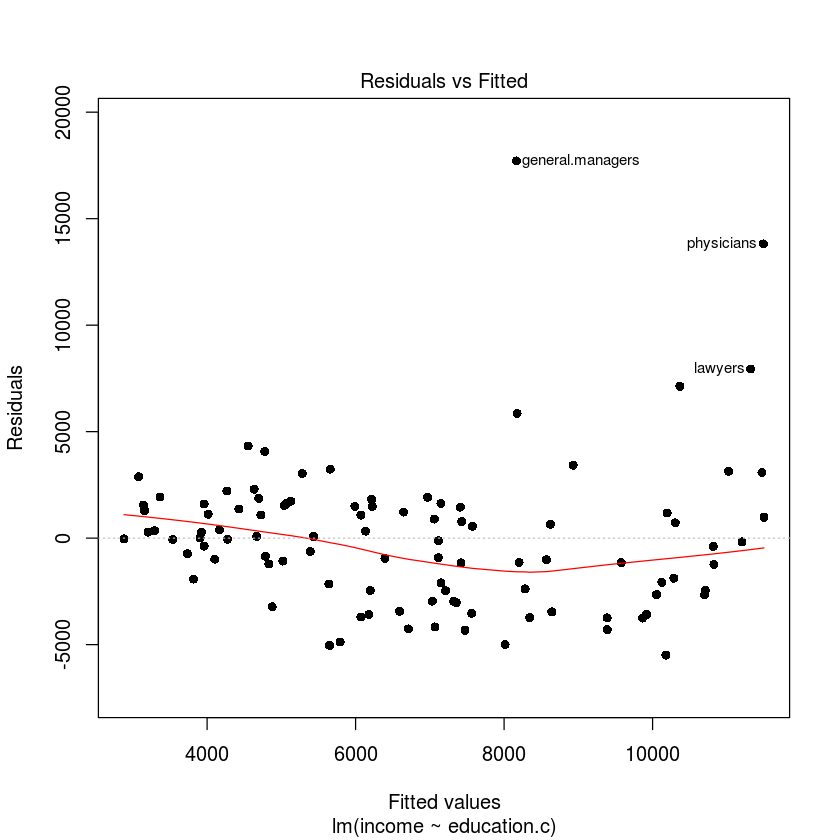

In [17]:
# visualize residuals and fitted values.
plot(mod, pch=16, which=1)

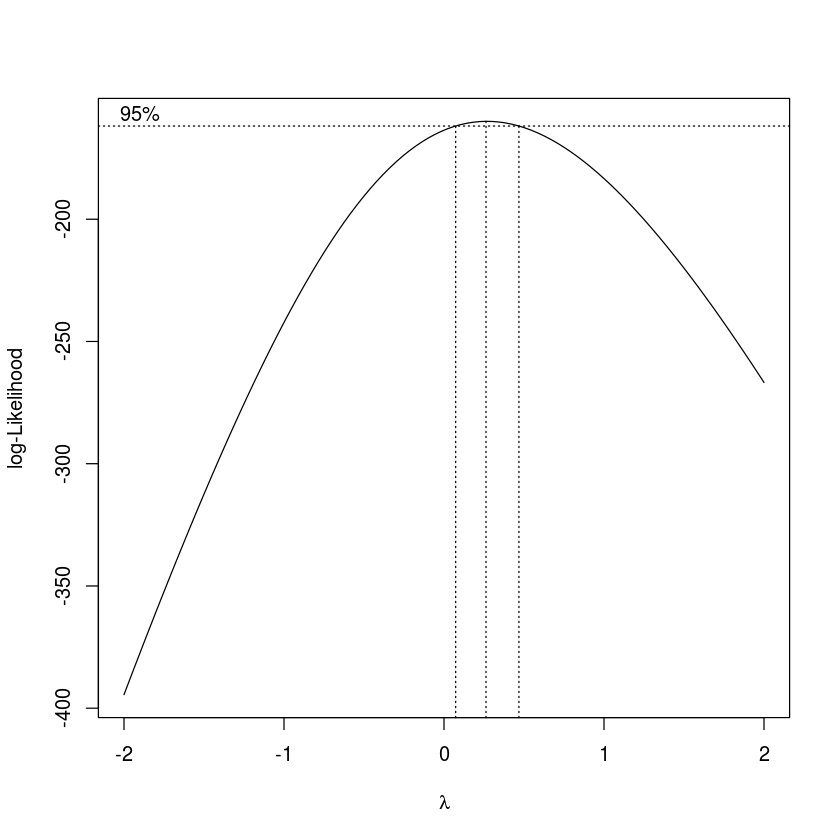

In [18]:
# Run the box-cox transform on the model results and pin point the optimal lambda value.
trans = boxcox(mod)

In [19]:
trans_df = as.data.frame(trans)
optimal_lambda = trans_df[which.max(trans$y),1]

In [20]:
# Create a new calculated variable based on the optimal lambda value and inspect the new dataframe.
newdata = cbind(newdata, newdata$income^optimal_lambda)
names(newdata)[3] = "income_transf"
head(newdata,5)

,education,income,income_transf
gov.administrators,13.11,12351,11.87376
general.managers,12.26,25879,14.41969
accountants,12.77,9271,11.01214
purchasing.officers,11.42,8865,10.88339
chemists,14.62,8403,10.73148


In [21]:
summary(newdata)

   education          income      income_transf   
 Min.   : 6.380   Min.   :  611   Min.   : 5.391  
 1st Qu.: 8.445   1st Qu.: 4106   1st Qu.: 8.891  
 Median :10.540   Median : 5930   Median : 9.793  
 Mean   :10.738   Mean   : 6798   Mean   : 9.837  
 3rd Qu.:12.648   3rd Qu.: 8187   3rd Qu.:10.658  
 Max.   :15.970   Max.   :25879   Max.   :14.420  

In [22]:
# fit a linear model on the income_transf data and run a summary of its results.
set.seed(2)
education.c = scale(newdata$education, center=TRUE, scale=FALSE)
mod2 = lm(income_transf ~ education.c, data = newdata)
summary(mod2)


Call:
lm(formula = income_transf ~ education.c, data = newdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0410 -0.6146  0.0123  0.8209  4.1006 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.83702    0.12131  81.088  < 2e-16 ***
education.c  0.31676    0.04468   7.089 1.94e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.225 on 100 degrees of freedom
Multiple R-squared:  0.3345,	Adjusted R-squared:  0.3278 
F-statistic: 50.26 on 1 and 100 DF,  p-value: 1.945e-10


Warning message:
“Ignoring unknown parameters: labels”Warning message:
“Ignoring unknown parameters: labels”

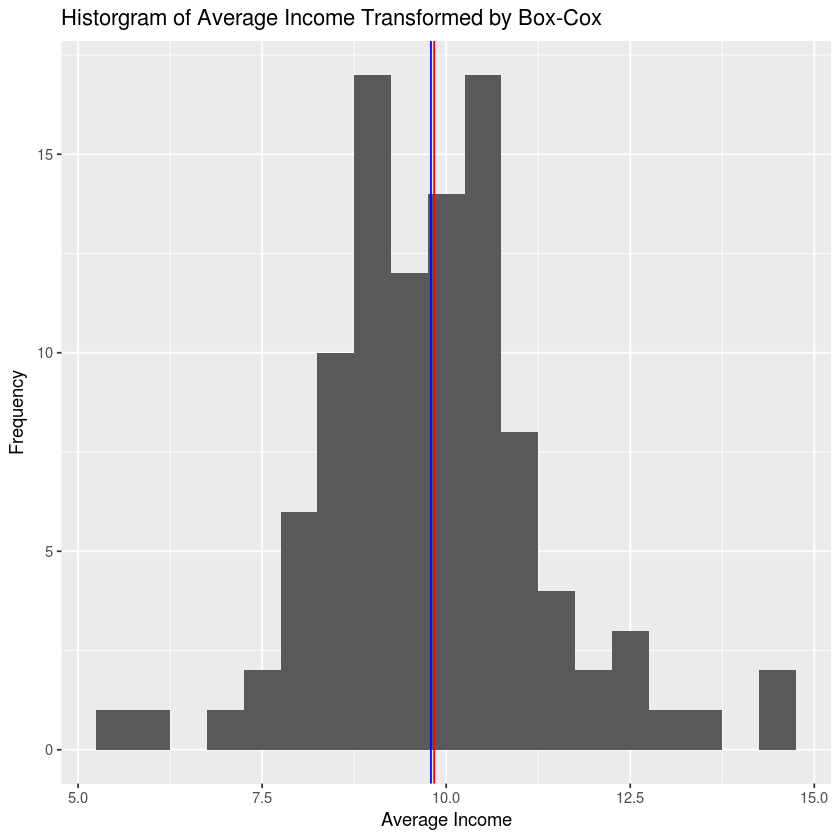

In [24]:
qplot(income_transf, data = newdata, geom="histogram", binwidth=0.5) +
  labs(title = "Historgram of Average Income Transformed by Box-Cox") +
  labs(x ="Average Income") +
  labs(y = "Frequency") +
  geom_vline(xintercept = mean(newdata$income_transf), show.legend=TRUE, color="red", labels="Average") +
  geom_vline(xintercept = median(newdata$income_transf), show.legend=TRUE, color="blue", labels="Median")

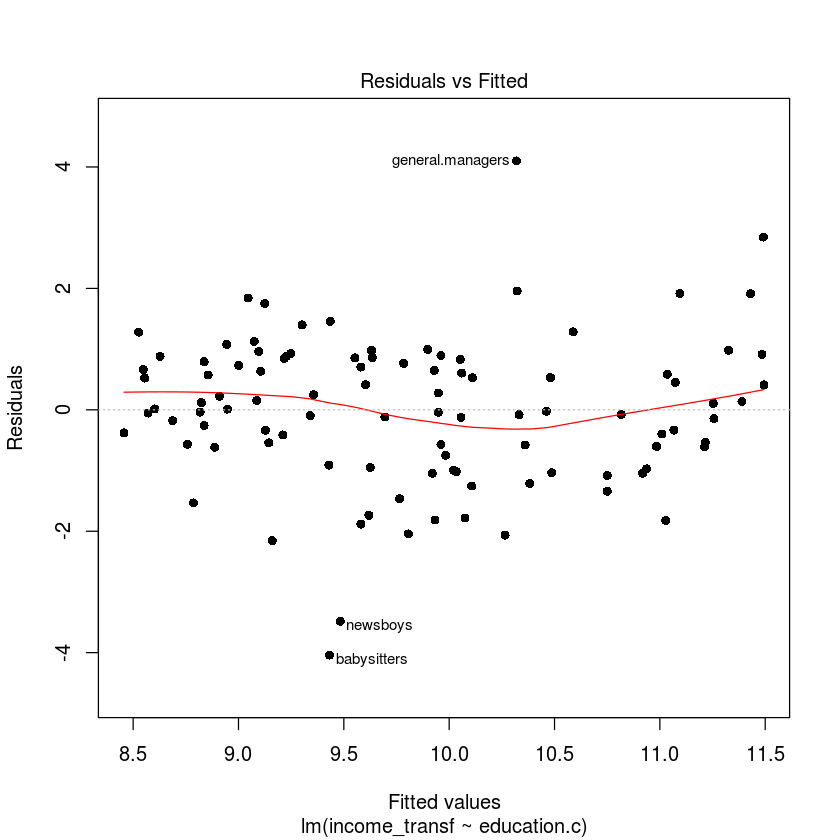

In [25]:
plot(mod2, pch=16, which=1)